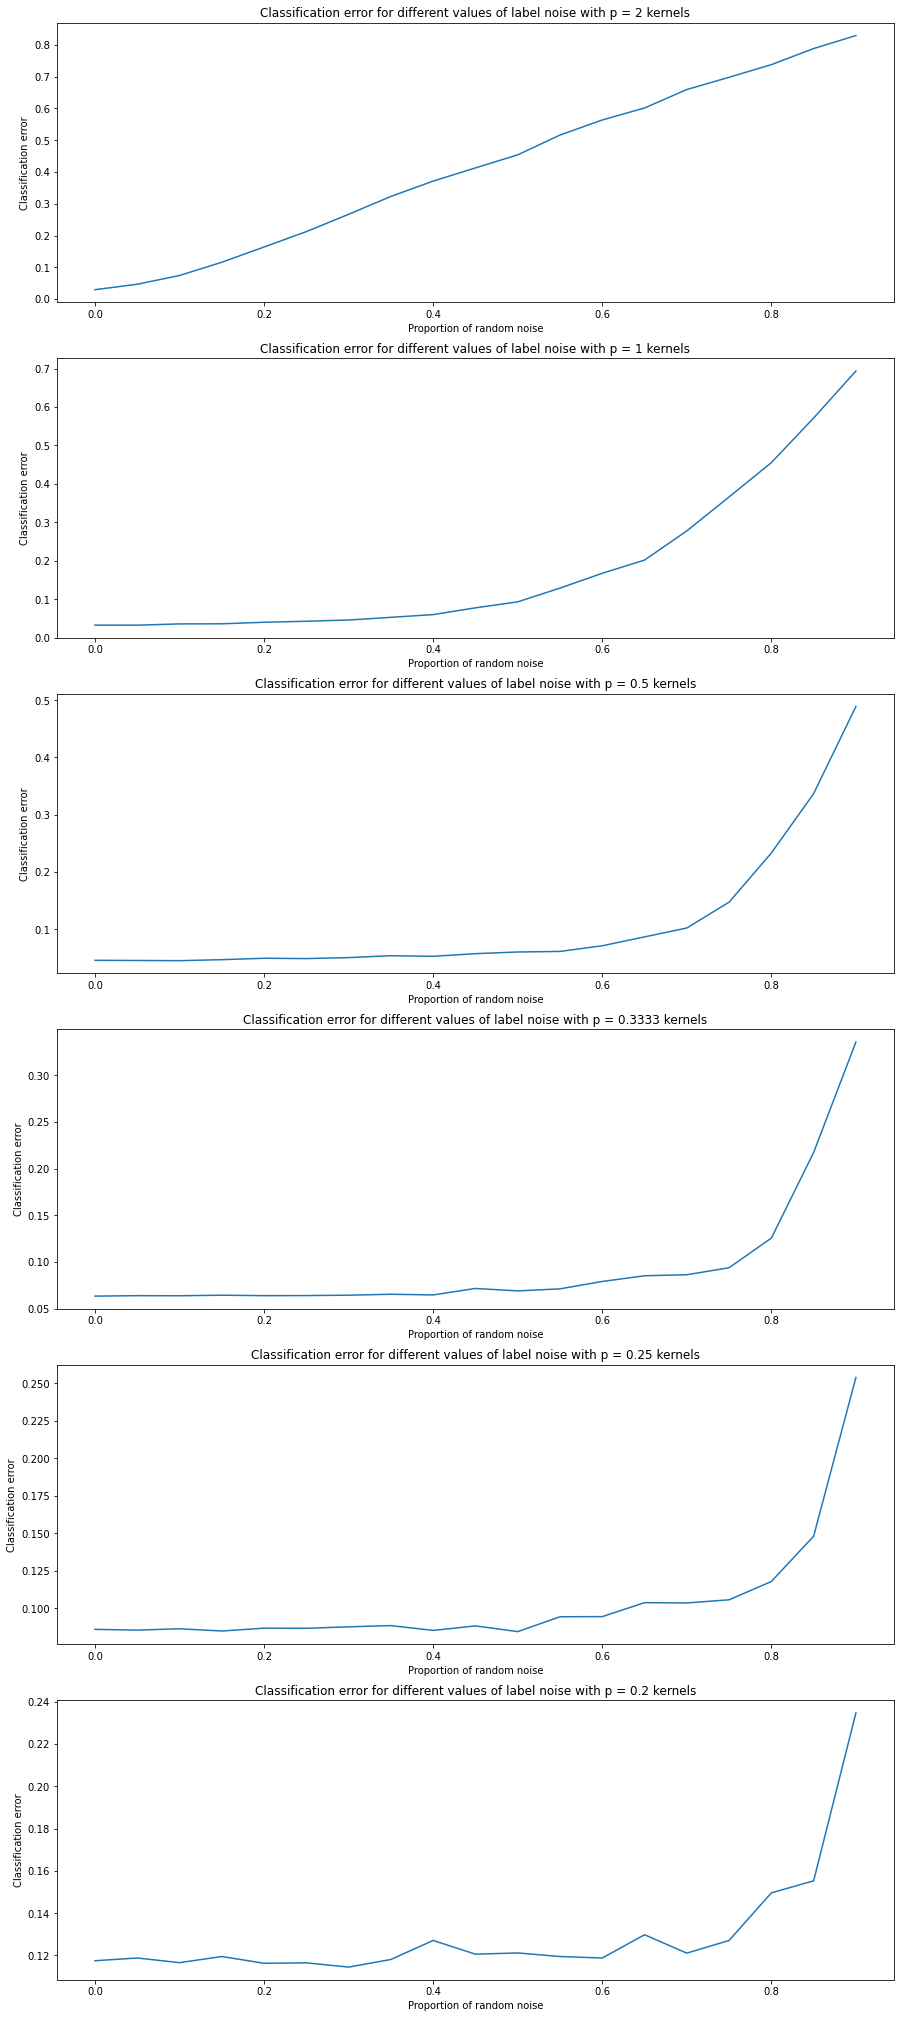

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

if os.path.exists('../out/results.json'):
    with open('../out/results.json', 'r') as f:
        results = json.load(f)
elif os.path.exists('../test/out/test_results.json'):
    with open('../test/out/test_results.json', 'r') as f:
        results = json.load(f)
else:
    raise ValueError('There are no results stored in the `out` folder.')
with open('../config/script-params.json', 'r') as f:
    sp = json.load(f)
    
noisiness = np.arange(sp['min_noise'], sp['max_noise'] + sp['noise_step'], sp['noise_step'])
num_plots = len(sp['p_kernels'])
    
fig, axes = plt.subplots(num_plots, 1, figsize = (15, 6 * num_plots))

for i, p_key in zip(range(num_plots), results.keys()):
    legend = []
    for c_key in results[p_key].keys():
        axes[i].plot(noisiness, results[p_key][c_key])
        legend.append(f'c = {c_key}')
    axes[i].set_title(f'Classification error for different values of label noise with p = {p_key} kernels')
    axes[i].set_xlabel('Proportion of random noise')
    axes[i].set_ylabel('Classification error')
    if len(legend) > 1:
        axes[i].legend(legend)